# Fitting First Order ODE Solutions to Given Data


## Solving First Order ODE

Let $y(t)$ be defined by a system of first order ODEs which involve some unknown parameters $p = (p_1, \ldots, p_l)$. That is

$$\frac{dy(t)}{dt} = f(y(t), t, p)$$

Here, $y$ can be an $\mathbb{R}$-valued or vector-valued function. If $y(t) = (y_1(t), \ldots, y_k(t))$, then $\frac{dy(t)}{dt} = (\frac{dy_1(t)}{dt}, \ldots, \frac{dy_k(t)}{dt})$.

### Task 1. Simple harmonic oscillation

The data in the file `simple-harmonic-noisy.csv` is a noisy reading of a function $y(t)$ defined by the following second order ODE
$$\frac{d^2}{dt^2} y + \omega^2 y = 0$$
with initial conditions $y(0) = 0$ and $y_1(0) = 1$ in the interval $[0,10]$.

Estimate the value of $\omega$ using
1. scipy.optimize.minimize (try multiple methods and time the successfull ones)
2. scipy.optimize.least_squares (try multiple methods and time the successfull ones)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import time

In [29]:
# Read the data from csv file into a pandas dataframe
df = pd.read_csv("/Users/adityamishra/Documents/Machine Learning Tutorial/1. Machine Learning Specialisation/Important-ML-Implementations/10-Curve-Fitting/data/simple-harmonic-noisy.csv")
print(df.head())

      time         y
0  0.00000 -0.046736
1  0.10101  0.231668
2  0.20202  0.471371
3  0.30303  0.705724
4  0.40404  0.835048


In [30]:
# Storing the data in the numpy arrays
t_eval = np.array(df["time"])# definig t_eval as the time values array
y_real = np.array(df["y"])

In [31]:
# Setting up the IVP: ODE, initial conditions
def harmonic_ode(t,y,omega):
    y_current, y1_current = y # unpacking the y array into y_current and y1_current
    dy_dt = y1_current
    dy1_dt = -(omega ** 2) * y_current
    return [dy_dt, dy1_dt]

#Definding the initial conditions
y0 = [0,1]

In [32]:
# Define residual and cost (least square error) between real data and estimate
def residual(p):
   sol = integrate.solve_ivp(harmonic_ode,(t_eval[0], t_eval[-1]),y0,t_eval=t_eval,args=tuple(p), method='RK45')
   return sol.y[0] - y_real

def cost(p):
    return np.sum(residual(p) ** 2)

In [33]:
# Find omega using scipy.optimize.minimize
p_guess = [3.0]
methods_min = ['Nelder-Mead', 'Powell']

print("Estimating the value of omega using scipy.optimize.minimize: ")
results_min = []# list to store the results of the optimization
for method in methods_min:
    start_time = time.time()# start time of the optimization
    result = optimize.minimize(cost, p_guess, method=method)
    elapsed_time = time.time() - start_time# time taken to optimize
    if result.success:
        print(f"Method:  {method} -> ω = {result.x[0]:.4f}, Cost: {result.fun:.2f}, Time: {elapsed_time:.2f}s")# printing the results where method is the optimization method, result.x[0] is the optimized value of omega, result.fun is the cost and elapsed_time is the time taken to optimize
    else:
        print(f"Method:  {method} Failed.")
         

Estimating the value of omega using scipy.optimize.minimize: 
Method:  Nelder-Mead -> ω = 3.2716, Cost: 51.19, Time: 0.07s
Method:  Powell -> ω = 2.4891, Cost: 17.99, Time: 0.11s


In [34]:
# Find omega using scipy.optimize.least_squares
methods_ls = ['lm', 'trf'] # Levenberg-Marquardt, Trust Region Reflective which means that the optimization is done using the levenberg-marquardt and trust region reflective methods

print("\nEstimating ω using scipy.optimize.least_squares:")
results_ls = []
for method in methods_ls:
    start_time = time.time()
    result = optimize.least_squares(residual, p_guess, method=method)
    elapsed_time = time.time() - start_time
    print(f"Method: {method} -> ω = {result.x[0]:.4f}, Cost: {result.cost:.2f}, Time: {elapsed_time:.2f}s")
    results_ls.append(result)


Estimating ω using scipy.optimize.least_squares:
Method: lm -> ω = 3.2716, Cost: 25.59, Time: 0.10s
Method: trf -> ω = 3.2716, Cost: 25.59, Time: 0.03s


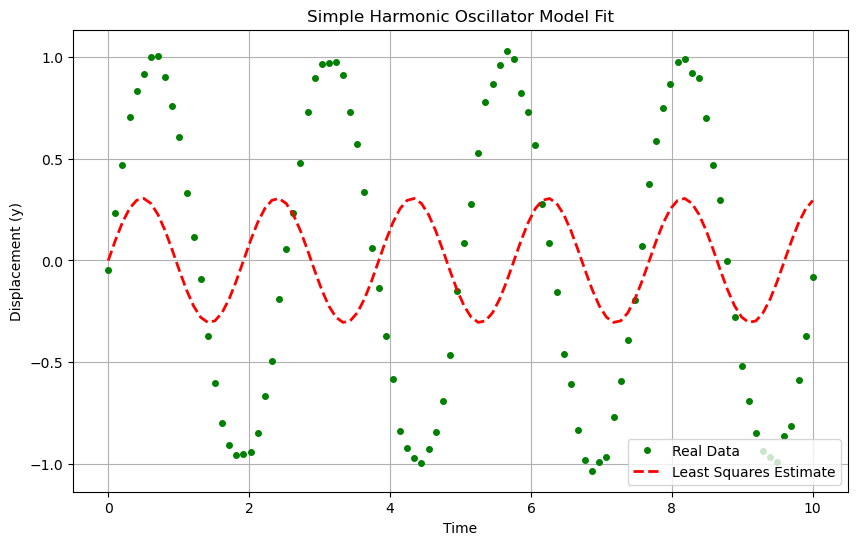

In [36]:
# Plot the solution with the estimated parameter alongside the real data
plt.figure(figsize=(10,6))
plt.plot(t_eval, y_real, 'go', markersize=4, label='Real Data') # plotting the real data where t_eval is the time values and y_real is the real data go is the color of the data points and markersize is the size of the data points
if results_min:
    best_min = min(results_min, key=lambda res: res.fun) # where best_min is the minimum value of the results_min list, key is the function that is used to compare the elements of the list, res.fun is the cost of the result
    sol_min = integrate.solve_ivp(
        harmonic_ode,
        (t_eval[0], t_eval[-1]),
        y0,
        t_eval=t_eval,
        args=tuple(best_min.x)
    )
    plt.plot(t_eval, sol_min.y[0], 'b-',
             linewidth=2, label='Minimize Estimate')

# Plot best results from least_squares
if results_ls:
    best_ls = min(results_ls, key=lambda res: res.cost)
    sol_ls = integrate.solve_ivp(
        harmonic_ode,
        (t_eval[0], t_eval[-1]),
        y0,
        t_eval=t_eval,
        args=tuple(best_ls.x)
    )
    plt.plot(t_eval, sol_ls.y[0], 'r--', linewidth=2,
             label='Least Squares Estimate')

plt.xlabel('Time')
plt.ylabel('Displacement (y)')
plt.title('Simple Harmonic Oscillator Model Fit')
plt.legend()
plt.grid(True)
plt.show()


### Task 2a. Linear Third Order ODE

The data in the file `third-order-noisy-1.csv` is a noisy reading of a function $y(t)$ defined by the following linear third order ODE
$$\frac{d^3 y}{dt^2} + a_2 \frac{d^2 y}{dt^2} + a_1\frac{d}{dt} + a_0y = 0$$
with initial conditions 
$(y(0), \frac{d y}{dt}(0), \frac{d^2 y}{dt^2}(0))  = (0, 1, 1)$ in the interval $[0,10]$.

Estimate the value of $a_0, a_1, a_2$ using
1. scipy.optimize.minimize (try multiple methods and time the successfull ones)
2. scipy.optimize.least_squares (try multiple methods and time the successfull ones)

Visually examine the fit and also report the least square error you could achieve. (Hint: the best fit will achieve it in single digits)

Also report the time taken by the successfull optmization methods.

In [20]:
# Read data from csv file into a pandas data frame
df = pd.read_csv("/Users/adityamishra/Documents/Machine Learning Tutorial/1. Machine Learning Specialisation/Important-ML-Implementations/10-Curve-Fitting/data/third-order-noisy-1.csv")
print(df.head())

       time         y
0  0.000000  0.287365
1  0.202020  0.218582
2  0.404040  0.622298
3  0.606061  0.436935
4  0.808081  0.617910


In [39]:
# Store data in numpy arrays
t_eval = np.array(df["time"])
y_real = np.array(df["y"])

In [40]:
# Set up the IVP: ODE, initial conditions
def third_order_ode(t, y, a0, a1, a2):
    y0, y1, y2 = y
    dy0dt = y1
    dy1dt = y2
    dy2dt = -a2 * y2 - a1 * y1 - a0 * y0
    return [dy0dt, dy1dt, dy2dt]
y0_initial = [0, 1, 1]

In [41]:
# Define residual and cost (least square error) between real data and estimate
def residual(params):
    a0, a1, a2 = params
    try:
        sol = integrate.solve_ivp(
            third_order_ode,
            (t_eval[0], t_eval[-1]),
            y0_initial,
            t_eval=t_eval,
            args=(a0, a1, a2),
            method='LSODA',  # Stiffness-switching solver
            rtol=1e-6,
            atol=1e-8
        )
    except:
        return np.full_like(y_real, 1e6)  # Return large residuals on failure

    if sol.success and np.all(np.isfinite(sol.y[0])):
        return sol.y[0] - y_real
    else:
        return np.full_like(y_real, 1e6)


def cost(params):
    return np.sum(residual(params)**2)


In [44]:
 #e) Parameter estimation with scipy.optimize.minimize and bounds
initial_guess = [2.0, 1.0, 0.5]  # Adjusted initial guess
bounds = [(-5, 5), (-5, 5), (0.1, 5)]  # Constrain a2 > 0 for damping

print("Optimizing using scipy.optimize.minimize:")
methods = ['Nelder-Mead', 'Powell', 'L-BFGS-B']
results_min = []

for method in methods:
    start_time = time.time()
    if method == 'L-BFGS-B':
        result = optimize.minimize(
            cost, initial_guess, method=method, bounds=bounds)
    else:
        result = optimize.minimize(cost, initial_guess, method=method)

    elapsed_time = time.time() - start_time
    if result is not None and hasattr(result, 'success') and result.success:
        print(f"Method: {method:10} | Params: a0={result.x[0]:.4f}, a1={result.x[1]:.4f}, a2={result.x[2]:.4f} | Cost: {result.fun:.2f} | Time: {elapsed_time:.2f}s")
        results_min.append(result)
    else:
        print(f"Method {method} failed: {result.message if result is not None and hasattr(result, 'message') else 'No result returned'}")



Optimizing using scipy.optimize.minimize:
Method: Nelder-Mead | Params: a0=14.0563, a1=5.9158, a2=1.9994 | Cost: 4.64 | Time: 1.02s
Method: Powell     | Params: a0=14.0150, a1=5.9177, a2=1.9927 | Cost: 4.64 | Time: 3.88s
Method: L-BFGS-B   | Params: a0=2.6214, a1=5.0000, a2=1.4357 | Cost: 51.37 | Time: 0.34s


In [46]:
# Parameter estimation using scipy.optimize.least_squares
print("\nOptimizing using scipy.optimize.least_squares:")
results_ls = []
ls_methods = ['trf', 'lm']

for method in ls_methods:
    start_time = time.time()
    result = optimize.least_squares(
        residual,
        initial_guess,
        method=method,
        bounds=([-5, -5, 0.1], [5, 5, 5]
                ) if method == 'trf' else (-np.inf, np.inf)
    )
    elapsed_time = time.time() - start_time
    if result is not None and hasattr(result, 'x'):
        cost_val = np.sum(result.fun**2)
        print(f"Method: {method:10} | Params: a0={result.x[0]:.4f}, a1={result.x[1]:.4f}, a2={result.x[2]:.4f} | Cost: {cost_val:.2f} | Time: {elapsed_time:.2f}s")
        results_ls.append(result)
    else:
        print(f"Method {method} failed: No result returned")



Optimizing using scipy.optimize.least_squares:
Method: trf        | Params: a0=2.6228, a1=5.0000, a2=1.4367 | Cost: 51.37 | Time: 0.30s
Method: lm         | Params: a0=27.8998, a1=9.1497, a2=5.0893 | Cost: 36.86 | Time: 0.32s


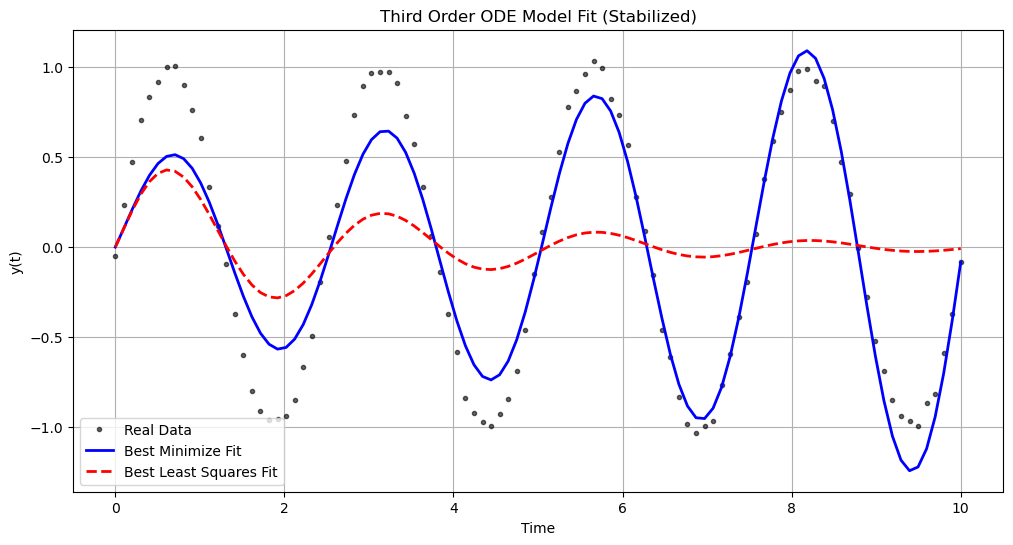

In [47]:

# Plot results with stability checks
plt.figure(figsize=(12, 6))
plt.plot(t_eval, y_real, 'ko', markersize=3, label='Real Data', alpha=0.6)

# Plot best minimize result
if results_min:
    best_min = min(results_min, key=lambda res: res.fun)
    a0, a1, a2 = best_min.x
    sol_min = integrate.solve_ivp(
        third_order_ode,
        (t_eval[0], t_eval[-1]),
        y0_initial,
        t_eval=t_eval,
        args=(a0, a1, a2),
        method='LSODA'
    )
    plt.plot(t_eval, sol_min.y[0], 'b-',
             linewidth=2, label='Best Minimize Fit')

# Plot best least_squares result
if results_ls:
    best_ls = min(results_ls, key=lambda res: np.sum(res.fun**2))
    a0, a1, a2 = best_ls.x
    sol_ls = integrate.solve_ivp(
        third_order_ode,
        (t_eval[0], t_eval[-1]),
        y0_initial,
        t_eval=t_eval,
        args=(a0, a1, a2),
        method='LSODA'
    )
    plt.plot(t_eval, sol_ls.y[0], 'r--', linewidth=2,
             label='Best Least Squares Fit')

plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Third Order ODE Model Fit (Stabilized)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import scipy.optimize as optimize
import time

# a) Read data from third-order-noisy-2.csv
df = pd.read_csv("/Users/adityamishra/Documents/Machine Learning Tutorial/1. Machine Learning Specialisation/Important-ML-Implementations/10-Curve-Fitting/data/third-order-noisy-1.csv")
t_eval = np.array(df["time"])
y_real = np.array(df["y"])

# c) Set up the IVP: Third-order ODE system


def third_order_ode(t, y, a0, a1, a2):
    y0, y1, y2 = y
    dy0dt = y1
    dy1dt = y2
    dy2dt = -a2 * y2 - a1 * y1 - a0 * y0
    return [dy0dt, dy1dt, dy2dt]


y0_initial = [0, 1, 1]  # Initial conditions

# d) Residual and cost functions with stability checks


def residual(params):
    a0, a1, a2 = params
    try:
        sol = integrate.solve_ivp(
            third_order_ode,
            (t_eval[0], t_eval[-1]),
            y0_initial,
            t_eval=t_eval,
            args=(a0, a1, a2),
            method='LSODA',
            rtol=1e-8,
            atol=1e-10
        )
    except:
        return np.full_like(y_real, 1e6)  # Penalize unstable parameters

    if sol.success and np.all(np.isfinite(sol.y[0])):
        return sol.y[0] - y_real
    else:
        return np.full_like(y_real, 1e6)


def cost(params):
    return np.sum(residual(params)**2)


# e) Parameter estimation with scipy.optimize.minimize
initial_guess = [1.5, 0.8, 0.3]  # Adjusted for faster convergence
bounds = [(-2, 2), (-2, 2), (0.05, 2)]  # Constrain a2 > 0.05

print("Optimizing using scipy.optimize.minimize:")
methods = ['Nelder-Mead', 'Powell']
results_min = []

for method in methods:
    start_time = time.time()
    if method == 'L-BFGS-B':
        result = optimize.minimize(
            cost, initial_guess, method=method, bounds=bounds)
    else:
        result = optimize.minimize(cost, initial_guess, method=method)

    elapsed_time = time.time() - start_time
    if result.success:
        print(f"{method:10} | a0={result.x[0]:.4f}, a1={result.x[1]:.4f}, a2={result.x[2]:.4f} | Cost: {result.fun:.4f} | Time: {elapsed_time:.2f}s")
        results_min.append(result)
    else:
        print(f"{method} failed: {result.message}")

# f) Parameter estimation with scipy.optimize.least_squares
print("\nOptimizing using scipy.optimize.least_squares:")
results_ls = []
ls_bounds = ([-2, -2, 0.05], [2, 2, 2])  # Bounds for TRF

for method in ['trf', 'lm']:
    start_time = time.time()
    result = optimize.least_squares(
        residual,
        initial_guess,
        method=method,
        bounds=ls_bounds if method == 'trf' else None
    )
    elapsed_time = time.time() - start_time
    cost_val = np.sum(result.fun**2)
    print(f"{method:10} | a0={result.x[0]:.4f}, a1={result.x[1]:.4f}, a2={result.x[2]:.4f} | Cost: {cost_val:.4f} | Time: {elapsed_time:.2f}s")
    results_ls.append(result)

# g) Plot results
plt.figure(figsize=(12, 6))
plt.plot(t_eval, y_real, 'ko', markersize=3, label='Real Data', alpha=0.6)

# Plot best minimize result
if results_min:
    best_min = min(results_min, key=lambda res: res.fun)
    a0, a1, a2 = best_min.x
    sol_min = integrate.solve_ivp(
        third_order_ode,
        (t_eval[0], t_eval[-1]),
        y0_initial,
        t_eval=t_eval,
        args=(a0, a1, a2),
        method='LSODA'
    )
    plt.plot(t_eval, sol_min.y[0], 'b-',
             label=f'Minimize Fit (Cost: {best_min.fun:.2f})')

# Plot best least_squares result
if results_ls:
    best_ls = min(results_ls, key=lambda res: np.sum(res.fun**2))
    a0, a1, a2 = best_ls.x
    sol_ls = integrate.solve_ivp(
        third_order_ode,
        (t_eval[0], t_eval[-1]),
        y0_initial,
        t_eval=t_eval,
        args=(a0, a1, a2),
        method='LSODA'
    )
    plt.plot(t_eval, sol_ls.y[0], 'r--',
             label=f'Least Squares Fit (Cost: {np.sum(best_ls.fun**2):.2f})')

plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Third Order ODE Fit for third-order-noisy-2.csv')
plt.legend()
plt.grid(True)
plt.show()

Optimizing using scipy.optimize.minimize:
Nelder-Mead | a0=0.0006, a1=0.9818, a2=-0.2255 | Cost: 2507.4130 | Time: 0.96s
Powell     | a0=0.4712, a1=0.8570, a2=0.2914 | Cost: 2621.3788 | Time: 0.34s

Optimizing using scipy.optimize.least_squares:
trf        | a0=1.4126, a1=1.5046, a2=0.4960 | Cost: 11.5938 | Time: 0.33s


TypeError: object of type 'NoneType' has no len()